<a href="https://colab.research.google.com/github/douglasbmoreira/desafio_sql/blob/main/Desafio_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text

In [2]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [3]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produtos = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)

In [4]:
engine = create_engine('sqlite:///memory:')

In [5]:
produtos.to_sql('produtos',engine,index=False)
itens_pedidos.to_sql('itens_pedidos', engine, index=False)
pedidos.to_sql('pedidos', engine, index=False)
vendedores.to_sql('vendedores', engine, index=False)

5

In [6]:
def sql_df(query):
  with engine.connect() as conexao:
    consulta = conexao.execute(text(query))
    dados = consulta.fetchall()
  return pd.DataFrame(dados, columns = consulta.keys())

# Desafio 1

Calcular a receita total obtida com a venda de itens. Na tabela itens_pedidos, o valor total dos itens representa o cálculo da quantidade pelo valor unitário e pode ser considerado como a receita da venda.

In [ ]:
query = 'SELECT SUM(VALOR_TOTAL) AS RECEITA FROM ITENS_PEDIDOS'
df_itens_pedidos = sql_df(query)
df_itens_pedidos

,RECEITA
0,45803930


# Desafio 2
Identificar quais as 15 marcas que foram as mais pedidas por quantidades de venda. Busque mostrar essa lista em uma visualização, além de expor o nome das marcas.

In [ ]:
query = '''SELECT PRODUTOS.MARCA, COUNT (*) AS 'Pedidos'
FROM PRODUTOS, ITENS_PEDIDOS
WHERE PRODUTOS.PRODUTO_ID = ITENS_PEDIDOS.PRODUTO_ID
GROUP BY PRODUTOS.MARCA
ORDER BY COUNT(*) ASC;
'''
df_marcas = sql_df(query)
df_marcas

,marca,Pedidos
0,Talie Nk,94
1,Track & Field,96
2,Ateliê de Calças,99
3,Bottega Veneta,101
4,Bcbgmaxzria,103
...,...,...
112,Banana Republic,584
113,Le Lis Blanc,715
114,Animale,1128
115,Mixed,1673


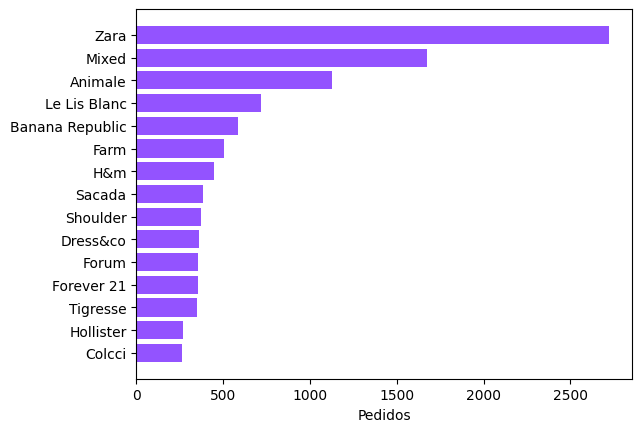

In [ ]:
plt.barh(df_marcas['marca'][-15:], df_marcas['Pedidos'][-15:], color = '#9353FF')
plt.xlabel('Pedidos')
plt.show()

# Desafio 3
Exibir os 10 produtos mais vendidos durante o ano de 2019

In [ ]:
display(produtos, pedidos)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248,Usado
...,...,...,...,...,...,...
200,14074,Camisa Amarela Laco,450,Carol Bassi,309858,Usado
201,33349,Vestido Listras Malha,270,Calvin Klein,307118,Usado
202,22568,Casaqueto Estampa Geometrica,245,Zara,244931,Usado
203,40508,Regata Bicolor Alcinha,245,Express,247166,Usado


,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575
...,...,...,...,...,...
24522,63716,64127,1,2021-03-09,2360
24523,63999,37384,2,2021-03-09,2800
24524,64594,100932,1,2021-03-10,19500
24525,64811,3820,3,2021-03-10,417


In [ ]:
query = '''SELECT PRODUTOS.PRODUTO, COUNT(PEDIDOS.PEDIDO_ID) AS 'TOTAL_PEDIDOS'
FROM PRODUTOS, PEDIDOS
WHERE strftime('%Y', data_compra) = '2020' AND PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTOS.PRODUTO
ORDER BY TOTAL_PEDIDOS DESC
LIMIT 10
'''

sql_df(query)

,produto,TOTAL_PEDIDOS
0,Calca Alfaiataria Preta,149
1,Vestido Recortes Cores,135
2,Saia Pregas Preta,129
3,Calca Jeans Costuras,127
4,Blusa Veludo Flores,93
5,Shorts Jeans Tye Dye,92
6,Sapato Cetim Pink,90
7,Saia Midi Cinto,90
8,Camisa Fio Animalprint,90
9,Vestido Longo Estampa,89


# Desafio 4
Publicar a distribuição através dos meses da receita obtida em vendas no ano de 2021

In [ ]:
query = '''SELECT strftime('%m', data_compra) AS mes, SUM(total) AS receita
FROM pedidos
WHERE strftime('%Y', data_compra) = '2021'
GROUP BY mes
'''

sql_df(query)

,mes,receita
0,01,2097109
1,02,1140729
2,03,51525


# Desafio 5
Listar as marcas vendidas em São Paulo por quantidade de pedidos

In [ ]:
query = ''' SELECT  PRODUTOS.MARCA, COUNT (*) AS 'Produtos vendidos'
FROM PRODUTOS
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY PRODUTOS.MARCA
ORDER BY COUNT(ITENS_PEDIDOS.PRODUTO_ID) DESC;
'''

sql_df(query)

,marca,Produtos vendidos
0,Zara,100
1,Mixed,58
2,Animale,44
3,Le Lis Blanc,26
4,Banana Republic,18
...,...,...
111,Topshop,1
112,Morena Rosa,1
113,Erre Erre,1
114,Bobô,1


# Desafio 6
Publicar os produtos que são mais vendidos na época de Natal no Brasil todo

In [ ]:
query = '''SELECT PRODUTOS.PRODUTO, COUNT(*) AS quantidade_vendas
FROM ITENS_PEDIDOS
JOIN produtos ON produtos.produto_id = ITENS_PEDIDOS.produto_id
JOIN PEDIDOS ON PEDIDOS.PEDIDO_ID = ITENS_PEDIDOS.PEDIDO_ID
WHERE strftime('%m',PEDIDOS.data_compra)= '12'
GROUP BY produtos.produto
ORDER BY quantidade_vendas DESC;
'''
sql_df(query)

,produto,quantidade_vendas
0,Vestido Recortes Cores,30
1,Vestido Preto Franzido,26
2,Calca Jeans Costuras,26
3,Calca Alfaiataria Preta,26
4,Camisa Xadrez Azul,25
...,...,...
196,Sneaker Monograma Bege,6
197,Casaqueto Estampa Geometrica,6
198,Regata Renda Branca,5
199,Body Estampa Coracoes,5
